## Import key libraries

In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from scipy.stats import norm, skew
import os


### Load dataset

In [49]:
print(os.listdir("./"))
dayRentals = pd.read_csv("./day.csv")

['tree_reg.pkl', 'go', '.DS_Store', 'Archive', 'hour.csv', 'Readme.txt', '.ipynb_checkpoints', 'day.csv', 'Bike-sharing.ipynb']


## Exploratory Data Analysis

### Understand data

In [50]:
dayRentals.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [51]:
dayRentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [52]:
dayRentals["mnth"].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64

In [53]:
dayRentals.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Understand range and distribution of values

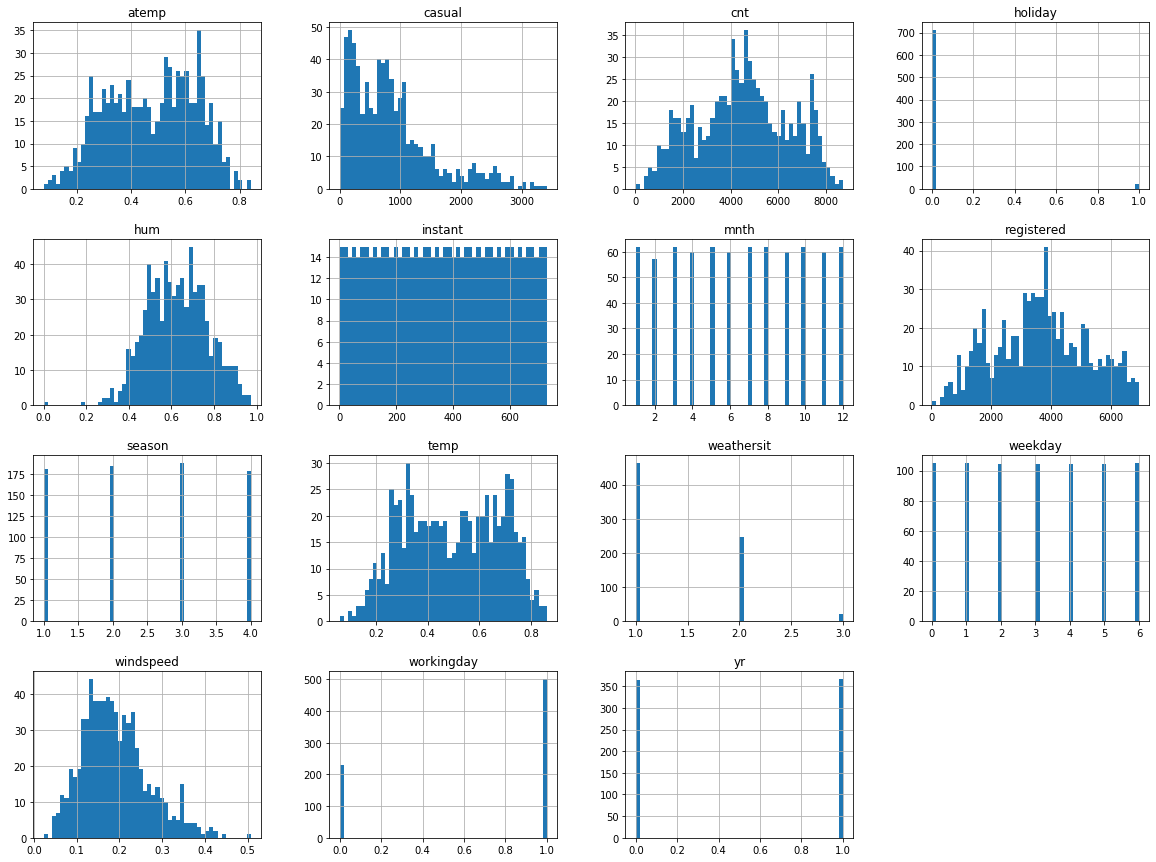

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
dayRentals.hist(bins=50, figsize = (20,15))
plt.show()

## Split Training and Test data - Randomized

In [55]:
#Split test data - Can also use scikit_learn's 

def split_train_test(data, test_ratio):
    np.random.seed(22)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_data, test_data = split_train_test (dayRentals, 0.2)
print (len(train_data))
print (len(test_data))

## Split training and test data set - Stratified Shuffle

In [56]:
# Split training data set and test data set

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dayRentals, dayRentals["weekday"]):
    strat_train_set = dayRentals.loc[train_index]
    strat_test_set = dayRentals.loc[test_index]
len(strat_train_set)

584

In [57]:
strat_train_set["weekday"].value_counts()

6    84
1    84
0    84
5    83
4    83
3    83
2    83
Name: weekday, dtype: int64

In [58]:
strat_test_set["weekday"].value_counts()

6    21
5    21
4    21
3    21
2    21
1    21
0    21
Name: weekday, dtype: int64

## Find relationships among attributes

In [ ]:
train_copy = strat_train_set.copy()

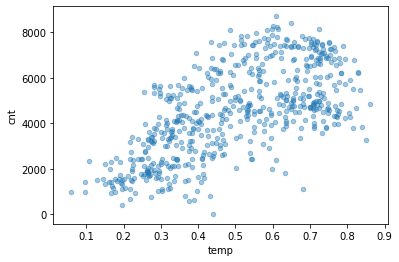

In [59]:
train_copy.plot(kind="scatter",x="temp",y="cnt",alpha=0.4)

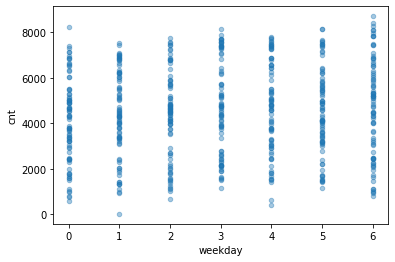

In [60]:
train_copy.plot(kind="scatter",x="weekday",y="cnt",alpha=0.4)

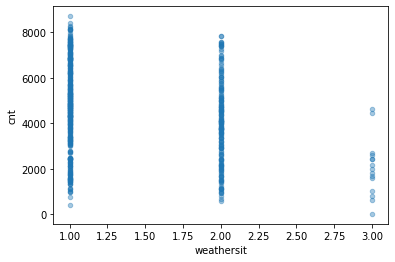

In [61]:
train_copy.plot(kind="scatter",x="weathersit",y="cnt",alpha=0.4)

In [62]:
corr_matrix = train_copy.corr()

In [63]:
corr_matrix["cnt"].sort_values(ascending=False)  # Only linear relationships. 

cnt           1.000000
registered    0.945142
casual        0.671182
atemp         0.649224
temp          0.646976
instant       0.646746
yr            0.586200
season        0.409312
mnth          0.275433
weekday       0.087751
workingday    0.061029
hum          -0.084013
holiday      -0.092622
windspeed    -0.230875
weathersit   -0.275985
Name: cnt, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12f794ed0>,
      dtype=object)

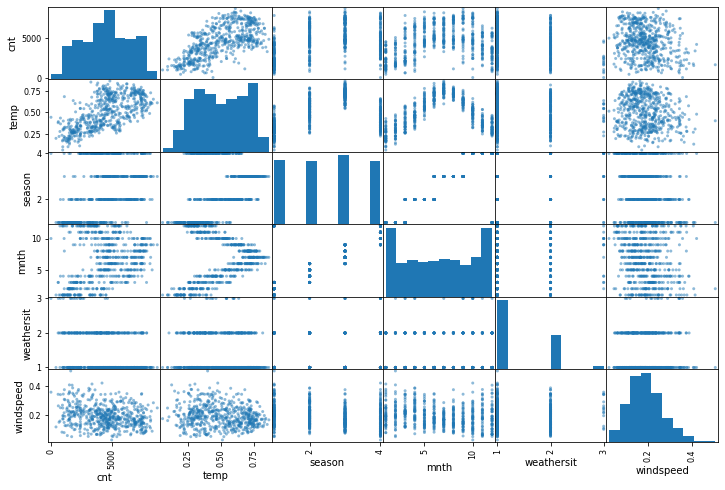

In [64]:
from pandas.plotting import scatter_matrix
attributes = ["cnt","temp","season","mnth","weathersit","windspeed"]
scatter_matrix(train_copy[attributes], figsize=(12, 8))

## Data/Feature Engineering

Impute missing data  
Transform values to numeric (if data set has text attributes)  
*Normalization - scale everything so they fall between standard values (say 0 to 1)*

In [65]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

def prep_data(dataset):
    cropped_data=dataset.drop("cnt",axis=1).drop("dteday",axis=1)
    labels = dataset["cnt"].copy(deep=False)
    standardizer = MinMaxScaler()
    transformed_data = standardizer.fit_transform(cropped_data)
    return transformed_data, labels.tolist()


In [66]:
train_data, train_data_labels = prep_data(strat_train_set)
pd.DataFrame(train_data).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.499193,0.501712,0.498288,0.503113,0.032534,0.499429,0.679795,0.187500,0.545777,0.530704,0.639594,0.346142,0.251982,0.526532
std,0.288450,0.369915,0.500426,0.313142,0.177566,0.334332,0.466955,0.267505,0.230060,0.219183,0.145925,0.158104,0.203642,0.227394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249657,0.333333,0.000000,0.272727,0.000000,0.166667,0.000000,0.000000,0.349199,0.346341,0.527849,0.230789,0.091476,0.354859
50%,0.497940,0.666667,0.000000,0.545455,0.000000,0.500000,1.000000,0.000000,0.545191,0.540870,0.640317,0.330767,0.214935,0.527938
75%,0.750343,0.666667,1.000000,0.818182,0.000000,0.833333,1.000000,0.500000,0.749232,0.717050,0.742786,0.437520,0.330913,0.691561
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Linear regression model

### Example of a linear function in real world.  E.g. Rental income = No. of users times Rs. 10 + Rs. 20 fixed fee for new subscriptions

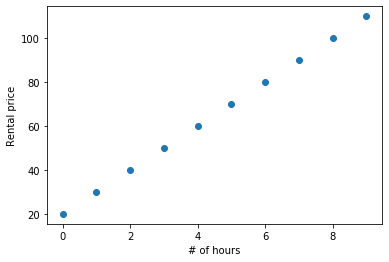

In [67]:
x = np.arange(10)
y = 20+10*x
plt.scatter(x, y)  
plt.xlabel('# of hours') 
plt.ylabel('Rental price') 
plt.show() 

### Example when the relationship is somewhat linear but not linear - in single dimension

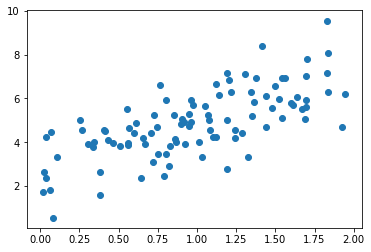

In [68]:
x = 2 * np.random.rand(100, 1)
y = 3 + 2 * x + np.random.randn(100, 1)
plt.scatter(x, y)  
plt.show() 

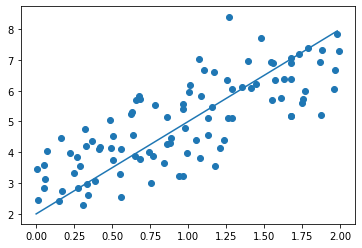

In [69]:
x = 2 * np.random.rand(100, 1)
y = 3 + 2 * x + np.random.randn(100, 1)
plt.scatter(x, y)  
p=0.02*np.arange(100)
q=2+3*p
plt.plot(p,q)
plt.show()

## Modeling with Linear Regression

In [72]:
linear_reg = LinearRegression()
linear_reg.fit(train_data,train_data_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predict with some sample data from the test data set

In [73]:
strat_test_set.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
164,165,2011-06-14,2,0,6,0,2,1,1,0.604167,0.591546,0.507083,0.269283,727,4164,4891
186,187,2011-07-06,3,0,7,0,3,1,1,0.720000,0.685633,0.743333,0.149883,784,3845,4629
79,80,2011-03-21,2,0,3,0,1,1,2,0.430435,0.409735,0.737391,0.288783,401,1676,2077
207,208,2011-07-27,3,0,7,0,3,1,1,0.775000,0.690667,0.402917,0.183463,755,3901,4656
14,15,2011-01-15,1,0,1,0,6,0,2,0.233333,0.248112,0.498750,0.157963,222,1026,1248


In [75]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score

test_data, test_data_labels = prep_data(strat_test_set)
#print(test_data_labels)
predictions = linear_reg.predict(test_data)
mse = mean_squared_error(test_data_labels,predictions)
rmse = float(np.sqrt(mse))
print (rmse)
mae = mean_absolute_error(test_data_labels,predictions)
print (mae)


199.84092883665565
156.33825026361413


In [76]:
print (predictions[:5])
print (test_data_labels[:5])

[4921.51520969 4639.28466997 1831.30172979 4666.91696793  915.7189407 ]
[4891, 4629, 2077, 4656, 1248]


In [77]:
linear_reg.coef_
linear_reg.singular_
linear_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

## DecisionTree Regression model

In [80]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_data,train_data_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [81]:
test_data, test_data_labels = prep_data(strat_test_set)
predictions = tree_reg.predict(test_data)
mse = mean_squared_error(test_data_labels,predictions)
rmse = (np.sqrt(mse))
print(rmse)
mae = mean_absolute_error(test_data_labels,predictions)
print (mae)

306.6013720787045
221.47619047619048


In [ ]:
print("predictions:", tree_reg.predict(test_data))
print("labels:",test_data_labels)

In [ ]:
import joblib

joblib.dump(tree_reg, "tree_reg.pkl")
# and later...
my_model_loaded = joblib.load("tree_reg.pkl")

In [ ]:
from sklearn_porter import Porter
porter = Porter(tree_reg, language='go')
output = porter.export(embed_data=True)
print (output)